In [473]:
%pip install keras_preprocessing
%pip install matplotlib
%pip install idx2numpy
%pip install pillow
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [474]:
from keras_preprocessing import image as img
import os
from matplotlib import pyplot as plt
import idx2numpy
import keras_preprocessing
import tensorflow as tf


In [475]:
os.system("rm ./simulation/I.txt")

0

In [476]:
sizt = 28
path = "mnist/data/t10k-images-idx3-ubyte"

In [477]:
sizeM = open("./simulation/sizeM.txt","w")
sizeM.write(str(sizt))
sizeM.close()
f = open("./simulation/I.txt","w")

In [478]:
array = idx2numpy.convert_from_file(path)[0]
k = 0
l= 0

for i in array:
    for j in i:
        strtmp = f'{hex(int((j/255)*2**3))[2:]}'
        strtmp2 = '0'*(2-len(strtmp))+strtmp+' '
        f.write(strtmp2)
        # print(f'{strtmp2}',end='  ')
    f.write("\n")
    # print("\n")
f.close()

In [479]:
def concat(n):
    # print(int('0x'+n,16))
    integ = bin(int('0x'+n,16))
    integ = ('0'*(16-len(integ[2:]))+integ[2:])
    # print(integ[15])
    # print(integ,"c")
    # print(integ[0])
    a = int(int("0b"+integ,2)/16)
    if(str(integ[0])=='1'):

        # print ("AJKHAH")
        # print(integ,n,"a")
        temp1 = integ.replace("0","k")
        # print(temp1)
        temp2 = temp1.replace('1','0')
        # print(temp2)
        integ = temp2.replace('k','1')
        # print(integ)
        a = -int((int("0b"+integ,2)+1)/16)
    # print(integ,'h')

    return [a]

In [480]:
modelo_dig = tf.keras.models.load_model("./model_network/digits_recognition_cnn.h5")

In [481]:
kernels = modelo_dig.weights[0]
kernel0 = kernels[:,:,:,0]

In [482]:
def tohex(val, nbits):
    return hex((val + (1 << nbits)) % (1 << nbits))
print(tohex(-2, 16).lstrip('0x').lower())
# print(hex(-1518255953).replace('0x','').upper())
# print(tohex(-1518255953, 32).lstrip('0x').upper())

fffe


In [483]:
def kernel_txt(i,kernel):
    ker = open(f"simulation/Kernel{i}.txt",'w')
    kernel0_0 = np.array(kernel[:,:,0])
    base = 8
    for i in kernel0_0:
        for j in i:
            print((int(j*2**base)),end=' ')
            strtmp2 = tohex(int(j*2**base),16)+' '
            ker.write(strtmp2[2:])
            # print(f'{strtmp2}',end='  ')
        ker.write("\n")
        print('\n')
    ker.close()

In [484]:
lim = np.array(kernels.shape)[::-1][0]
for i in range(lim):
    kernel_txt(i,kernels[:,:,:,i])

-51 59 17 57 -10 

2 93 25 -24 -72 

20 33 -57 128 102 

5 -17 -52 45 56 

-26 -11 -16 -81 -56 

109 29 -18 -84 -40 

-11 37 53 105 -51 

7 76 125 77 -3 

-65 -51 70 20 -57 

-103 -65 24 118 -30 

-4 11 -37 -100 18 

-1 -62 -138 -117 -85 

49 67 -40 -126 -159 

48 113 136 100 -29 

45 -12 79 182 104 

29 -10 79 -16 20 

44 42 48 51 -141 

30 29 60 -111 -139 

84 129 30 -91 -7 

50 87 32 -131 -117 

-138 -129 -41 103 131 

-84 -84 20 -15 129 

-62 -94 -74 -2 60 

18 52 0 97 -9 

-1 19 28 77 25 

-80 30 -3 125 44 

-66 65 55 56 80 

-1 -10 4 40 39 

-130 53 -36 -138 -139 

-21 -5 -52 -106 -44 

-46 -83 -63 82 43 

-30 8 42 42 -21 

0 147 35 137 35 

140 93 -74 10 42 

-114 -145 -161 -130 -46 

-98 -161 10 -45 36 

59 40 123 52 131 

-6 91 98 25 9 

48 -3 22 0 -80 

16 -101 -82 -126 -126 



kernel0

In [485]:
out = open("./simulation/IxKernel.txt","r")

klin1 = []
m1=[]
k= out.readlines()
for i in k:
    m1.append(list(map(concat,i.split())))


In [486]:
out2 = open("./simulation/maxIxKernelPooling.txt","r")
klin2 = []
m2=[]
k2 = out2.readlines()
for i in k2:
    m2.append(list(map(concat,i.split())))


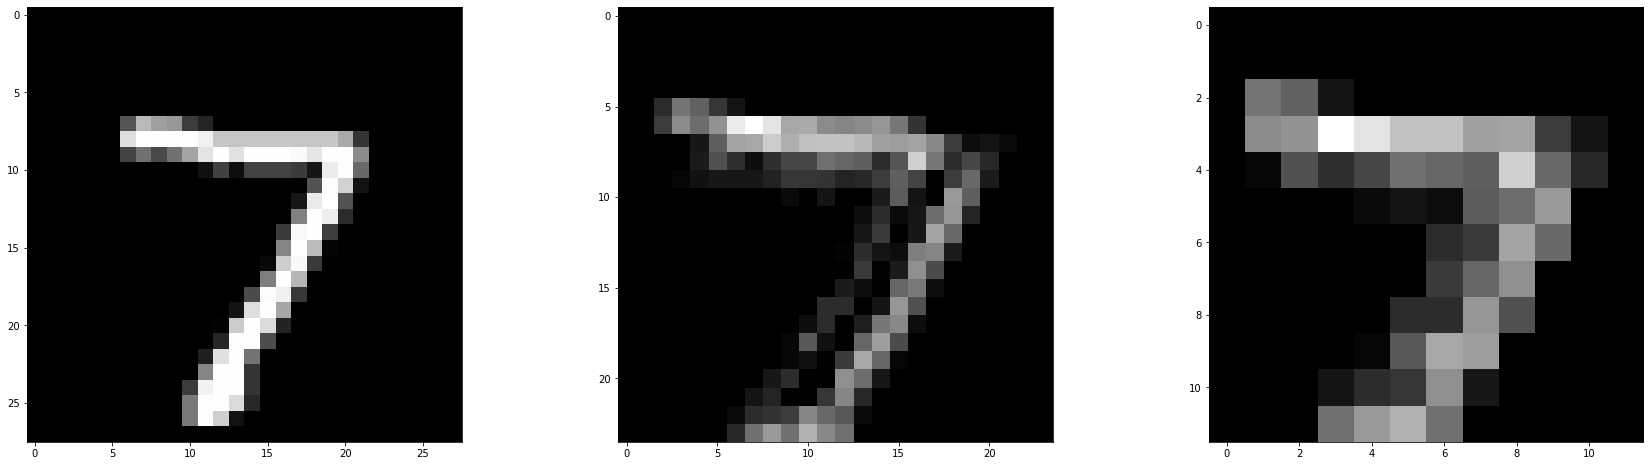

In [487]:
plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
plt.imshow(array,cmap="gray")
plt.subplot(1,3,2)
plt.imshow(m1,cmap="gray")
plt.subplot(1,3,3)
plt.imshow(m2,cmap="gray")
plt.show()


In [488]:
m2

[[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]],
 [[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]],
 [[0], [34], [29], [6], [0], [0], [0], [0], [0], [0], [0], [0]],
 [[0], [41], [43], [75], [67], [57], [57], [47], [48], [18], [6], [0]],
 [[0], [2], [24], [14], [21], [33], [30], [28], [61], [31], [12], [0]],
 [[0], [0], [0], [0], [3], [6], [4], [27], [32], [45], [0], [0]],
 [[0], [0], [0], [0], [0], [0], [13], [17], [48], [31], [0], [0]],
 [[0], [0], [0], [0], [0], [0], [17], [30], [42], [0], [0], [0]],
 [[0], [0], [0], [0], [0], [13], [13], [44], [24], [0], [0], [0]],
 [[0], [0], [0], [0], [2], [26], [49], [46], [0], [0], [0], [0]],
 [[0], [0], [0], [6], [13], [16], [42], [7], [0], [0], [0], [0]],
 [[0], [0], [0], [33], [45], [52], [33], [0], [0], [0], [0], [0]]]

In [489]:
os.system("rm ./images/preprocessamento.jpg")
os.system("rm ./images/posprocessamento.jpg")

img.save_img("./images/preprocessamento.jpg",array)
img.save_img("./images/posprocessamento.jpg",m1)
img.save_img("./images/maxpoolingposprocessamento.jpg",m2)


ValueError: Expected image array to have rank 3 (single image). Got array with shape: (28, 28)

hex(1)

In [ ]:
hex(1)

'0x1'